<a href="https://colab.research.google.com/github/Mithil01/AppliedAI-Assignments/blob/main/Custom%20SGD%20Logistic%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [2]:

X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)


In [3]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
#please don't change random state
# you need not standardize the data as it is already standardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))




## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>




<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [9]:
def initialize_weights(row_vector):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights as 1d array consisting of all zeros similar to the dimensions of row_vector
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    w = np.zeros(len(row_vector))
    b = 0
    return w,b

In [10]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [12]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sigmoid_z = 1/(1+np.exp(-z))
    return sigmoid_z

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [21]:
def logloss(y_true,y_pred):
    # you have been given two arrays y_true and y_pred and you have to calculate the logloss
    sum = 0
    n = len(y_true)
    for i in range(len(y_true)):
       sum += y_true[i]*np.log10(y_pred[i]) + (1-y_true[i])*np.log10(1-y_pred[i])
    #write your code here
    loss = -1 * (1/n) * sum
    return loss

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [16]:

def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    dw = x * (y - sigmoid(np.dot(w,x) + b)) - (alpha / N) * w
    return dw

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [17]:
#sb should be a scalar value
def gradient_db(x,y,w,b):
     '''In this function, we will compute gradient w.r.to b '''
     db = y - sigmoid(np.dot(w,x) + b)
     return db

In [18]:
# prediction function used to compute predicted_y given the dataset X
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)


<font color='blue'> Implementing logistic regression</font>

In [19]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    w, b = initialize_weights(X_train[0])
    train_loss = []
    test_loss = []
    num_epochs = []
    # for every epoch
    for _ in range(epochs):
        num_epochs.append(_)
        train_pred = []
        test_pred = []
        # for every data point(X_train,y_train)
        for i in range(N):
           #compute gradient w.r.to w (call the gradient_dw() function)
           dw = gradient_dw(X_train[i],y_train[i],w,b,alpha,N)
           #compute gradient w.r.to b (call the gradient_db() function)
           db = gradient_db(X_train[i],y_train[i],w,b)
           #update w, b
           w = w + (dw * eta0)
           b = b + (db * eta0)
        # predict the output of x_train [for all data points in X_train] using pred function with updated weights
        train_pred = pred(w,b,X_train)
        #compute the loss between predicted and actual values (call the loss function)
        tr_loss = logloss(y_train,train_pred)
        # store all the train loss values in a list
        train_loss.append(tr_loss)
        # predict the output of x_test [for all data points in X_test] using pred function with updated weights
        test_pred = pred(w,b,X_test)
        #compute the loss between predicted and actual values (call the loss function)
        te_loss = logloss(y_test,test_pred)
        # store all the test loss values in a list
        test_loss.append(te_loss)

    return w,b,train_loss,test_loss,num_epochs

In [22]:
alpha=0.001
eta0=0.0001
N=len(X_train)
epochs=30
w,b,train_loss,test_loss,num_epochs=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

In [23]:
#print thr value of weights w and bias b
print(w)
print(b)

[-0.42976827  0.19302768 -0.14846076  0.33809367 -0.22124891  0.56993189
 -0.44518181 -0.08991041  0.22181546  0.17381495  0.1987357  -0.00057396
 -0.08132144  0.33908883  0.02298488]
-0.8921009576671749


**Using Sklearn SGDClassifier to compare the results**

In [37]:
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', max_iter = 50, random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log', max_iter=50,
              random_state=15, verbose=2)

In [39]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.03 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.04 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.05 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.06 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.07 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.08 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.10 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log', max_iter=50,
              random_state=15, verbose=2)

In [26]:
#comparing the diff of weights and biases of custom SGDClassifier and Sklearn SGDClassifier

w-clf.coef_, b-clf.intercept_

(array([[-0.00640135,  0.00755203,  0.0001296 , -0.00335039, -0.01306221,
          0.0097661 ,  0.00724301,  0.00417772,  0.01254226, -0.00702631,
          0.0016838 , -0.00479311, -0.00171774,  0.00056082,  0.00031767]]),
 array([-0.03896266]))

Since the difference  is less than order of 10^-2, hence custom implementation is correct.

<font color='blue'>Plot your train and test loss vs epochs </font>


<function matplotlib.pyplot.show(*args, **kw)>

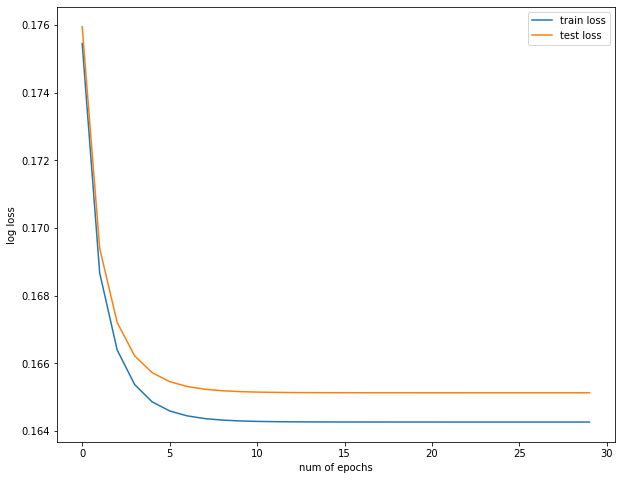

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(num_epochs,train_loss , label='train loss')
plt.plot(num_epochs,test_loss, label='test loss')
plt.xlabel("num of epochs")
plt.ylabel("log loss")
plt.legend()
plt.show

As you can observe from above plot for custom implemented SGD classifier, at start train loss is almost same as test loss, but at later point with increase in num of epochs, diff between train and test loss is clearly visible. 

In [28]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(np.dot(w,X[i])+b) >= 0.5: 
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print("train accuracy for Custom SGD :")
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print("test accuracy for Custom SGD :")
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

train accuracy for Custom SGD :
0.9522133333333334
test accuracy for Custom SGD :
0.95
